In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
from datetime import date
today = date.today()
from tqdm import tqdm
from sklearn.metrics import silhouette_score

In [76]:
df = pd.read_excel('OnlineRetail.xlsx')

In [3]:
#Sauvegarde dcopytaframe
df_sauv = df.copy()

In [4]:
df_sauv.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df = df_sauv

In [6]:
df.shape

(541909, 8)

In [7]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


<AxesSubplot:>

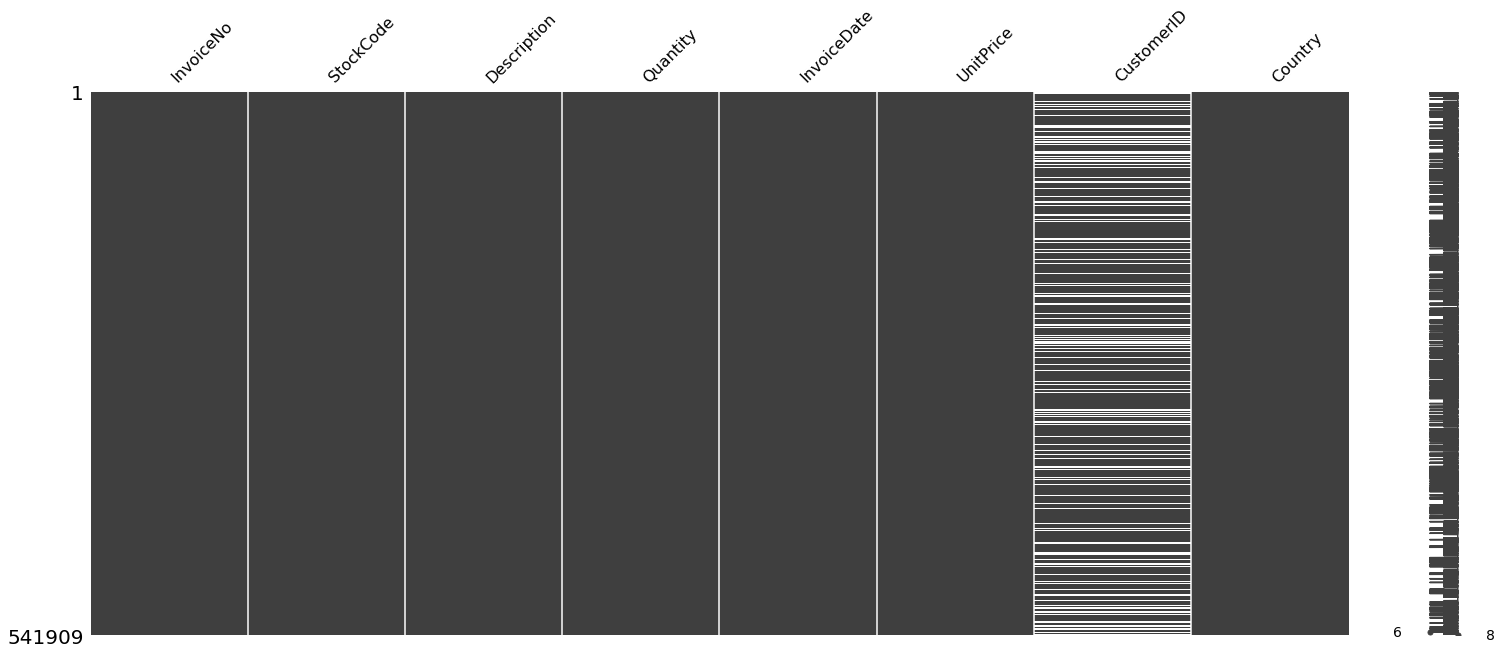

In [8]:
msno.matrix(df_sauv)

In [9]:
df['Description'].value_counts().head(50)

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
ASSORTED COLOUR BIRD ORNAMENT          1501
SET OF 3 CAKE TINS PANTRY DESIGN       1473
PACK OF 72 RETROSPOT CAKE CASES        1385
LUNCH BAG  BLACK SKULL.                1350
NATURAL SLATE HEART CHALKBOARD         1280
POSTAGE                                1252
JUMBO BAG PINK POLKADOT                1251
HEART OF WICKER SMALL                  1237
JAM MAKING SET WITH JARS               1229
JUMBO STORAGE BAG SUKI                 1214
PAPER CHAIN KIT 50'S CHRISTMAS         1210
JUMBO SHOPPER VINTAGE RED PAISLEY      1202
LUNCH BAG CARS BLUE                    1197
LUNCH BAG SPACEBOY DESIGN              1192
JAM MAKING SET PRINTED                 1182
RECIPE BOX PANTRY YELLOW DESIGN        1180
SPOTTY BUNTING                         1172
LUNCH BAG SUKI DESIGN           

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


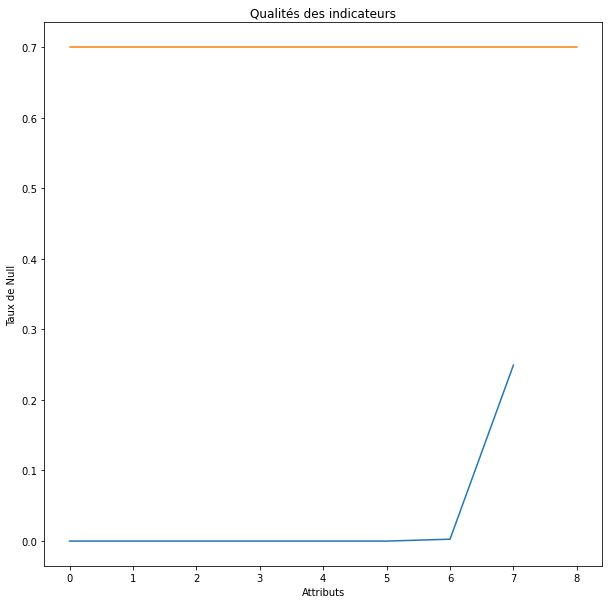

In [11]:
#Affichage d'une courbe de remplissage des attributs
indAvg = df_sauv.isna().mean().sort_values()
plt.figure(figsize=(10,10))
plt.plot(range(indAvg.shape[0]),indAvg.values)
plt.plot([0,indAvg.shape[0]],[0.7,0.7])
plt.xlabel('Attributs')
plt.ylabel('Taux de Null')
plt.title('Qualités des indicateurs')
plt.show()

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'InvoiceDate'}>],
       [<AxesSubplot:title={'center':'UnitPrice'}>,
        <AxesSubplot:title={'center':'CustomerID'}>]], dtype=object)

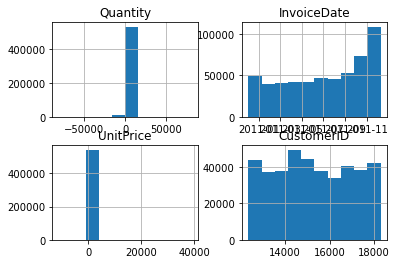

In [60]:
#Histogramme des variables
df.hist()

array([[<AxesSubplot:xlabel='Quantity', ylabel='Quantity'>,
        <AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>,
        <AxesSubplot:xlabel='CustomerID', ylabel='Quantity'>],
       [<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>,
        <AxesSubplot:xlabel='UnitPrice', ylabel='UnitPrice'>,
        <AxesSubplot:xlabel='CustomerID', ylabel='UnitPrice'>],
       [<AxesSubplot:xlabel='Quantity', ylabel='CustomerID'>,
        <AxesSubplot:xlabel='UnitPrice', ylabel='CustomerID'>,
        <AxesSubplot:xlabel='CustomerID', ylabel='CustomerID'>]],
      dtype=object)

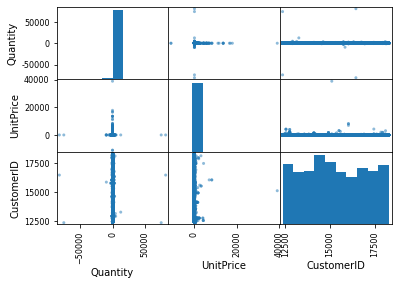

In [13]:
#affichage correlation entre les variables
from pandas.plotting import scatter_matrix
scatter_matrix(df)

In [14]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


# Changement de type des variables

In [77]:
#Conversion de date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True,format='%d/%m/%Y')
#Tri par date
df = df.sort_values('InvoiceDate')

#Conversion des champs numériques
# modification des types du dataset en float quand cela est nécessaire
num_col = ["Quantity","UnitPrice"]

for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')
#Utilisation de l'Option errors = coerce pour remplacer les erreurs de conversions avec NA

df['CustomerID'] = pd.to_numeric(df['CustomerID'], downcast='integer',errors='coerce')

# Nettoyage
* Suppression des annulation de commandes
* Suppression des valeurs aberrantes. Unit Price négatif

In [78]:
#Suppression des lignes non renseignées
df = df.dropna()

#Modification des commandes avec un produit à 0 en le remplaçant par la moyenne du produit
produit = df[df['UnitPrice']==0]['Description'].tolist()
for i in produit:
    df.loc[(df['UnitPrice']==0) & (df['Description'] == i),'UnitPrice'] = df.loc[(df['UnitPrice']!=0) & (df['Description'] == i)]['UnitPrice'].mean()

# Création de variables pour caractériser les commandes
Création des indicateurs RFM
* Récence : Date de la dernière commande (Ou nombre de jours depuis la dernière commande
* Fréquence = Fréquence du nombre de commande
* Montant = Montant des achats réalisés
* Nombre de produits achétés en moyenne (Ajout personnel)

In [79]:
#Fonction qui calcul le nombre de jour depuis la dernière commande
def daystoorders(date):
    return (today - date.date()).days

#Prendre peut être le max

In [ ]:
#Création du DF en group by par client\n",
df_by_customer = df.groupby(['CustomerID'])

"#Récupération des indicateurs souhaités
count_commande = df_by_customer['InvoiceNo'].count()
mean_quantity_by_customer = df_by_customer['Quantity'].mean()
sum_price_by_customer = df_by_customer['UnitPrice'].sum()
#Ajout des colonnes F
for x in count_commande.keys() :
    df.loc[df['CustomerID'] == x, 'F'] = count_commande[x]
    df.loc[df['CustomerID'] == x, 'mean_quantity'] = mean_quantity_by_customer[x]
    df.loc[df['CustomerID'] == x, 'M'] = sum_price_by_customer[x]

#Ajout de la colonne sur le nombre de jours depuis dernière commande
df['R'] = df.apply(lambda x: daystoorders(x['InvoiceDate']), axis = 1)

In [80]:
#Création du DF en group by par client
df_by_customer = df.groupby(['CustomerID'])

#Récupération des indicateurs souhaités
count_commande = df_by_customer['InvoiceNo'].count()
mean_quantity_by_customer = df_by_customer['Quantity'].mean()
sum_price_by_customer = df_by_customer['UnitPrice'].sum()
#Ajout des colonnes F
for x in count_commande.keys() :
    df.loc[df['CustomerID'] == x, 'F'] = count_commande[x]
    df.loc[df['CustomerID'] == x, 'mean_quantity'] = mean_quantity_by_customer[x]
    df.loc[df['CustomerID'] == x, 'M'] = sum_price_by_customer[x]

#Ajout de la colonne sur le nombre de jours depuis dernière commande
df['R'] = df.apply(lambda x: daystoorders(x['InvoiceDate']), axis = 1)

# Gestion des données catégorielles
* En premier lieu nous allons définir les données à utiliser
  * Jour de la semaine qui va être défini en semaine (Lun Mar Jeudi Vendredi), Weekend (Samedi, Dimanche) et Mercredi
  * Heure de la journée qui va être défini en Matin, Midi, après midi soirée
* Enfin transformation de ces valeurs en dimension avec la fonction dummies 

In [64]:
#Fonction qui renvoi le jour de la semaine
def joursemaine(date):
    return date.to_pydatetime().isocalendar()[2]

#Fonction qui renvoi l'heure de la journée
def heurejournee(date):
    return date.hour

In [81]:
#Création de la colonne pour le jour de la semaine
df['nbjoursemaine'] = df.apply(lambda x: joursemaine(x['InvoiceDate']), axis = 1)

#Création de la catégorie semaine
df['semaine'] = pd.cut(df['nbjoursemaine'],bins = [0,5,7],labels = ['Semaine','Weekend'])

In [82]:
#Création de la colonne pour l'heure de la journée\n",
df['heurejournee'] = df.apply(lambda x: heurejournee(x['InvoiceDate']), axis = 1)

#Création de la catégorie journée
df['journee'] = pd.cut(df['heurejournee'],bins = [5,11,14,19,23],labels = ['Matin','Midi','ApresMidi','Soiree'])

In [83]:
#Création du DF en group by par client et par semaine
df_by_customer_semaine = df.groupby(['CustomerID','semaine'])

#Création du DF en group by par client et par journée
df_by_customer_journee = df.groupby(['CustomerID','journee'])

In [84]:
#Création des colonnes pour le nombre de commande suivant la semaine
nb_commande_semaine = df_by_customer_semaine['semaine'].count()
for x in df_by_customer.groups.keys():
    df.loc[df['CustomerID'] == x, 'commandeSemaine'] = nb_commande_semaine[x][0]
    df.loc[df['CustomerID'] == x, 'commandeWeekend'] = nb_commande_semaine[x][1]

#Création des colonnes pour le nombre de commande suivant la journée
nb_commande_journee = df_by_customer_journee['journee'].count()
for x in df_by_customer.groups.keys():
    df.loc[df['CustomerID'] == x, 'commandeMatin'] = nb_commande_journee[x][0]
    df.loc[df['CustomerID'] == x, 'commandeMidi'] = nb_commande_journee[x][1]
    df.loc[df['CustomerID'] == x, 'commandeApresMidi'] = nb_commande_journee[x][2]
    df.loc[df['CustomerID'] == x, 'commandeSoiree'] = nb_commande_journee[x][3]

In [85]:
df.shape

(406829, 22)

# Gestion du Pays
* Finalement je ne le fais plus car quasi toutes les commandes en angleterre

In [86]:
#Mise à plate des données catégorielles
#final_df = pd.get_dummies(df, columns = {'Country'})
final_df = df

In [ ]:
#Fonction qui renvoi le jour de la semaine
def joursemaine(date):
    return date.to_pydatetime().isocalendar()[2]

#Fonction qui renvoi l'heure de la journée
def heurejournee(date):
    return date.hour

In [ ]:
#Création de la colonne pour le jour de la semaine
df['nbjoursemaine'] = df.apply(lambda x: joursemaine(x['InvoiceDate']), axis = 1)

#Création de la catégorie semaine
df['semaine'] = pd.cut(df['nbjoursemaine'],bins = [0,5,7],labels = ['Semaine','Weekend'])

In [ ]:
#Création de la colonne pour l'heure de la journée
df['heurejournee'] = df.apply(lambda x: heurejournee(x['InvoiceDate']), axis = 1)

#Création de la catégorie journée
df['journee'] = pd.cut(df['heurejournee'],bins = [5,11,14,19,23],labels = ['Matin','Midi','ApresMidi','Soiree'])

In [ ]:
#Création du DF en group by par client et par semaine
df_by_customer_semaine = df.groupby(['CustomerID','semaine'])

#Création du DF en group by par client et par journée
df_by_customer_journee = df.groupby(['CustomerID','journee'])

In [ ]:
#Création des colonnes pour le nombre de commande suivant la semaine
nb_commande_semaine = df_by_customer_semaine['semaine'].count()
for x in df_by_customer.groups.keys():
    df.loc[df['CustomerID'] == x, 'commandeSemaine'] = nb_commande_semaine[x][0]
    df.loc[df['CustomerID'] == x, 'commandeWeekend'] = nb_commande_semaine[x][1]

#Création des colonnes pour le nombre de commande suivant la journée
nb_commande_journee = df_by_customer_journee['journee'].count()
for x in df_by_customer.groups.keys():
    df.loc[df['CustomerID'] == x, 'commandeMatin'] = nb_commande_journee[x][0]
    df.loc[df['CustomerID'] == x, 'commandeMidi'] = nb_commande_journee[x][1]
    df.loc[df['CustomerID'] == x, 'commandeApresMidi'] = nb_commande_journee[x][2]
    df.loc[df['CustomerID'] == x, 'commandeSoiree'] = nb_commande_journee[x][3]
    

In [ ]:
df.shape

In [ ]:
#Mise à plate des données catégorielles
#final_df = pd.get_dummies(df, columns = {'Country'})
final_df = df

# Suppression
* Suppression des colonnes
* Suppression des lignes pour ne garder qu'une ligne par identifiant client

In [87]:
#Suppression des colonnes inutiles
final_df.drop({'InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','nbjoursemaine','semaine','heurejournee','journee','Country'}, axis=1, inplace=True)

In [88]:
final_df= final_df.drop_duplicates('CustomerID')

In [ ]:
#Suppression des colonnes inutiles
final_df.drop({'InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','nbjoursemaine','semaine','heurejournee','journee','Country'}, axis=1, inplace=True)

In [ ]:
final_df= final_df.drop_duplicates('CustomerID')

In [89]:
final_df.shape

(4372, 11)

In [90]:
final_df.head(10)

,CustomerID,F,mean_quantity,M,R,commandeSemaine,commandeWeekend,commandeMatin,commandeMidi,commandeApresMidi,commandeSoiree
0,17850.0,312.0,5.426282,1224.51,4002,312.0,0.0,183.0,95.0,34.0,0.0
24,13047.0,196.0,6.913265,798.30,4002,163.0,33.0,50.0,116.0,30.0,0.0
37,12583.0,251.0,19.956175,791.28,4002,237.0,14.0,113.0,125.0,13.0,0.0
46,13748.0,28.0,15.678571,111.90,4002,28.0,0.0,24.0,4.0,0.0,0.0
65,15100.0,6.0,9.666667,65.70,4002,6.0,0.0,2.0,2.0,2.0,0.0
83,15291.0,109.0,19.027523,551.17,4002,91.0,18.0,64.0,12.0,33.0,0.0
98,14688.0,359.0,8.974930,753.20,4002,359.0,0.0,156.0,181.0,22.0,0.0
131,15311.0,2491.0,15.142513,6267.75,4002,2392.0,99.0,408.0,1790.0,293.0,0.0
141,14527.0,1011.0,2.026706,5996.64,4002,961.0,50.0,43.0,926.0,42.0,0.0
105,17809.0,64.0,31.484375,897.19,4002,64.0,0.0,7.0,24.0,33.0,0.0


# Création jeu d'entrainement et jeu de test
* df_train_stand : dataframe jeu d'entrainement
* df_test_stand : dataframe jeu de test

In [91]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(final_df,test_size=0.2,random_state=42)

# Standardisation
* Normalisation et réduction pour la classification

In [92]:
#Création des jeux de données standardisés
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df_train)
final_df_stand = std_scale.transform(df_train)


In [93]:
df_train_stand = pd.DataFrame(final_df_stand,columns=final_df.columns)

# ACP

In [94]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from sklearn import decomposition

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

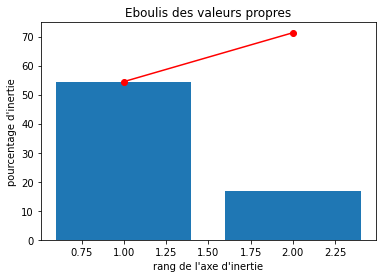

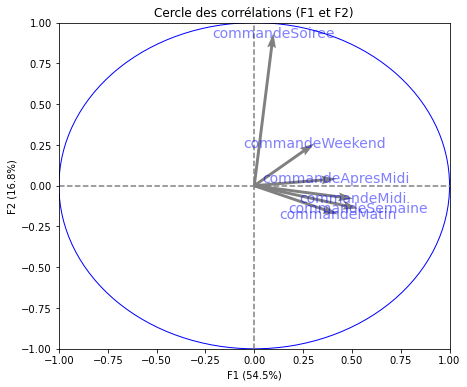

In [95]:
# choix du nombre de composantes à calculer
n_comp = 2

# selection des colonnes à prendre en compte dans l'ACP
listeind = {'commandeSemaine','commandeWeekend','commandeMatin','commandeMidi','commandeApresMidi','commandeSoiree'}
data_pca = df_train_stand[listeind]

X = data_pca.to_numpy()
features = data_pca.columns

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))


In [96]:
#Calcul des valeurs F1, F2 pour mes clients
X_reduced = pca.transform(X)

In [97]:
#Ajout de ces trois composantes dans mon Dataframe
df_train_stand['F1'] = X_reduced[:,0]
df_train_stand['F2'] = X_reduced[:,1]
#df_train_stand['F3'] = X_reduced[:,2]

In [98]:
#Suppression des colonnes inutiles
df_train_stand.drop({'commandeSemaine','commandeWeekend','commandeMatin','commandeMidi','commandeApresMidi','commandeSoiree'}, axis=1, inplace=True)


In [99]:
df_train_stand.head(10)

,CustomerID,F,mean_quantity,M,R,F1,F2
0,1.726597,-0.059063,-0.041634,-0.044307,-0.093014,-0.201556,-0.116073
1,-0.497677,-0.323934,-0.084824,-0.191605,1.170125,-0.523263,0.138595
2,-0.597592,-0.386540,-0.034945,-0.226259,-0.347338,-0.714811,-0.016783
3,-0.600497,-0.362461,-0.008955,-0.217457,1.254899,-0.671219,-0.023429
4,1.340878,-0.405804,-0.033231,-0.236061,-0.050627,-0.748867,0.010828
5,-1.462555,-0.179459,0.085345,-0.147681,-1.212037,-0.400448,-0.064090
6,-0.283324,-0.405804,-0.016095,-0.229685,0.805595,-0.749420,-0.004236
7,0.200567,1.631300,-0.042638,0.613747,1.144693,2.762900,-0.598268
8,-1.249945,-0.039799,-0.077167,-0.016908,0.542794,0.056589,0.238585
9,-1.298160,-0.290223,-0.007956,-0.198698,0.305426,-0.545032,-0.074563


# Partie Classification
* Le jeu d'entrainement va permettre de classifier les clients
*  A partir de ce modèle je vais prédire les catégories du jeu de test

# Détermination du nombre de cluster

100%|██████████| 8/8 [00:03<00:00,  2.30it/s]


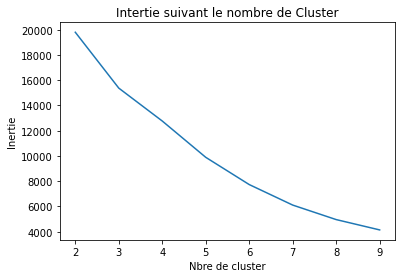

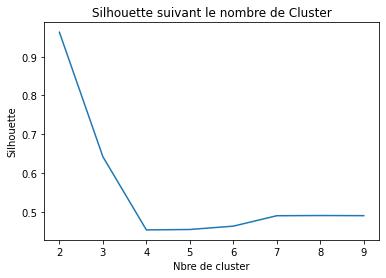

In [100]:
from sklearn.cluster import KMeans
#K-MEANS avec Coéfficient silhouette pour déterminer le meilleur k
sse = {}
silhouette_avg = {}
plusPetitCluster = {}
for k in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=0).fit(df_train_stand.loc[:,{'F','M','R','mean_quantity','F1','F2'}])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouette_avg[k] = silhouette_score(df_train_stand.loc[:,{'F','M','R','mean_quantity','F1','F2'}], kmeans.labels_)
    
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Nbre de cluster')
plt.ylabel('Inertie')
plt.title('Intertie suivant le nombre de Cluster')
plt.show()

plt.plot(list(silhouette_avg.keys()),list(silhouette_avg.values()))
plt.xlabel('Nbre de cluster')
plt.ylabel('Silhouette')
plt.title('Silhouette suivant le nombre de Cluster')
plt.show()

#Fixer le random state

In [101]:
#Kmeans avec 7 clusters
Model = KMeans(n_clusters=7, max_iter=10000,random_state=0)
kmeans= Model.fit(df_train_stand.loc[:,{'F','M','R','mean_quantity','F1','F2'}])
kmeans_labels = kmeans.labels_
print(silhouette_score(df_train_stand.loc[:,{'F','M','R','mean_quantity','F1','F2'}], kmeans_labels))

0.4896416468244678


In [102]:
df_train_stand['Classification'] =  kmeans_labels

In [103]:
df_train_stand['Classification'].value_counts()

3    1809
0    1298
2     355
6      22
5       9
1       3
4       1
Name: Classification, dtype: int64

# Fusion des plus petits clusters

In [104]:
#Fusionner les 4 Plus petits cluster
df_train_stand.loc[df_train_stand['Classification']==5,'Classification']=6
df_train_stand.loc[df_train_stand['Classification']==1,'Classification']=6
df_train_stand.loc[df_train_stand['Classification']==4,'Classification']=6

# Interprétation des classifications
* Parallel Plot pour analyser les différents cluster

<AxesSubplot:title={'center':'Distribution des groupes'}>

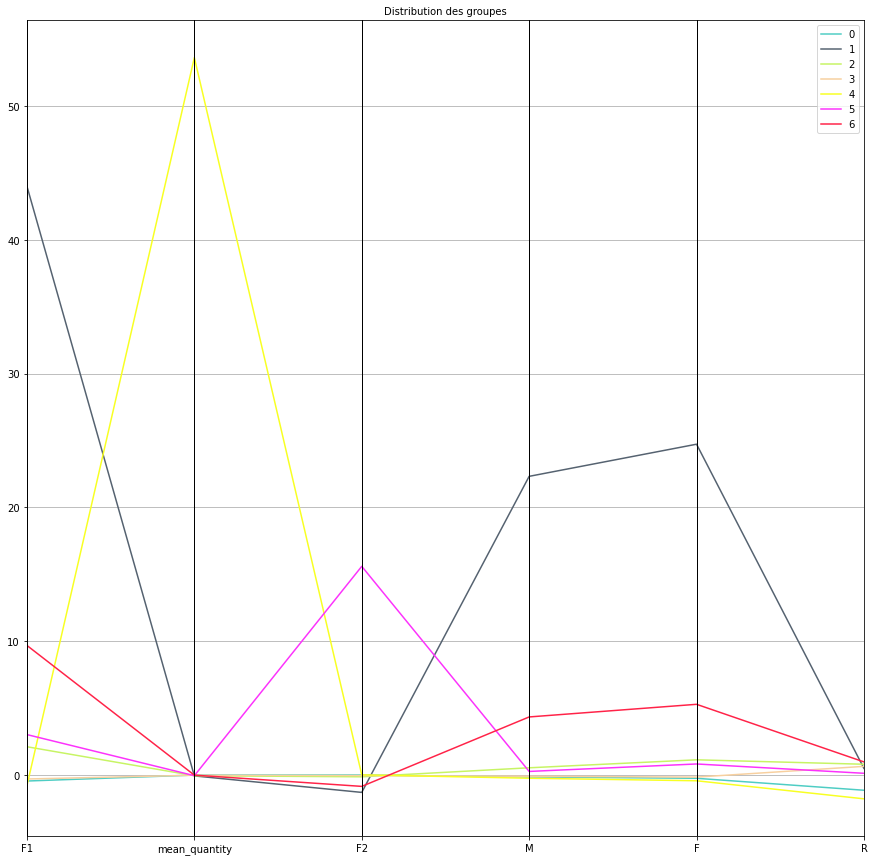

In [105]:
centroid = pd.DataFrame(Model.cluster_centers_,columns=df_train_stand.loc[:,{'F','M','R','mean_quantity','F1','F2'}].columns)
centroid['Classification'] =  centroid.index.to_list()

fig = plt.figure(1, figsize=(15, 15))
plt.title('Distribution des groupes', fontsize=10)

#pd.plotting.parallel_coordinates(df_train_stand.loc[:,{'Classification','F','M','R','mean_quantity','F1','F2'}],
#                                 'Classification', color=('#556270', '#4ECDC4', '#C7F464','#F7D09F'),sort_labels=True)

pd.plotting.parallel_coordinates(centroid,
                                 'Classification', color=('#556270', '#4ECDC4', '#C7F464','#F7D09F','#FC32FC','#FF2348','#F8FF23'),sort_labels=True)
    

#Revoir le graphiques avec uniquement les centroides
#Utiliser les variables initiales plutot que F1 et F2 dans un group by

# Prédiction des valeurs pour le jeu de test

In [106]:
df_test_stand = std_scale.transform(df_test)
df_test_stand = pd.DataFrame(df_test_stand,columns=df_test.columns)

data_pca = df_test_stand[listeind]
X_test = data_pca.to_numpy()
X_test_red= pca.transform(X_test)
df_test_stand['F1'] = X_test_red[:,0]
df_test_stand['F2'] = X_test_red[:,1]
#Suppression des colonnes inutiles
df_test_stand.drop({'commandeSemaine','commandeWeekend','commandeMatin','commandeMidi','commandeApresMidi','commandeSoiree'}, axis=1, inplace=True)

prediction = Model.predict(df_test_stand.loc[:,{'F','M','R','mean_quantity','F1','F2'}])
df_test_stand['Classification'] =  prediction

#Fusionner les 3 Plus petits cluster
df_test_stand.loc[df_test_stand['Classification']==5,'Classification']=6
df_test_stand.loc[df_test_stand['Classification']==1,'Classification']=6
df_test_stand.loc[df_test_stand['Classification']==4,'Classification']=6

In [107]:
df_test_stand.head(10)

,CustomerID,F,mean_quantity,M,R,F1,F2,Classification
0,-0.369879,-0.338382,-0.076927,-0.158107,0.356290,-0.626078,0.012105,3
1,-1.289447,1.597589,-0.059858,0.759906,1.204035,2.715825,-0.663087,2
2,1.571496,0.995608,-0.075104,0.485539,1.204035,1.671356,-0.522293,2
3,-0.052125,-0.405804,-0.071786,-0.226220,1.212512,-0.755950,0.005679,3
4,-1.655415,-0.295039,-0.046526,-0.136191,-1.364631,-0.550419,-0.076384,0
5,-1.014680,0.417706,-0.055256,0.735310,1.204035,0.915384,-0.026282,2
6,1.688257,-0.275776,-0.061271,-0.166309,1.136215,-0.515758,0.006411,3
7,1.107355,-0.362461,-0.048939,-0.209286,-0.194744,-0.619983,0.095461,3
8,-0.608629,-0.237249,-0.034067,-0.187424,-0.398202,-0.442059,0.009500,0
9,-1.347537,-0.323934,0.159546,-0.216710,-1.695251,-0.612977,-0.003232,0


# Création d'un jeu de test et d'entrainement
* Ceci n'est plus nécessaire car je l'ai déjà fait préalablement

In [108]:
from sklearn.model_selection import train_test_split
# On récupère les features d'un côté...
X = df_train_stand.drop({'Classification','CustomerID'}, axis=1).to_numpy()

# et les labels de l'autre
y = df_train_stand['Classification'].to_numpy()


X_test = df_test_stand.drop({'Classification','CustomerID'}, axis=1).to_numpy()

# et les labels de l'autre
y_test = df_test_stand[['Classification']].to_numpy()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Standardisation
* Normalisation et réduction pour la classification (Idem que précédemment. Plus nécessaire de le faire)

In [ ]:
#Création des jeux de données standardisés
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_stand = std_scale.transform(X_train)

X_test_stand = std_scale.transform(X_test)

# Modelisation

# Trois modèles réalisés
* Dummy regressor pour la Base line
* Ridge Classifier
* Decision Tree

In [109]:
from sklearn.dummy import DummyRegressor
#Base Line avec la Dummy Regressor
params = {}
model = DummyRegressor(strategy="mean")
model.fit(X,y)
model.score(X_test,y_test)

-0.007082764489644067

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

#Validation croisée pour regression linéaire Ridge
model = RidgeClassifier()
params = {'alpha':[0.1,0.2,0.3,0.4,0.5, 1,2,3,4,5]}
clf = GridSearchCV(model,params,cv=5,scoring='accuracy')
clf.fit(X, y)

print(clf.best_estimator_)
#Meilleur paramètre avec alpha = 0.1

RidgeClassifier(alpha=0.3)


In [111]:
#Evaluation du Score avec la regression Ridge
model = RidgeClassifier(alpha=.3)
model.fit(X,y)
model.score(X_test,y_test)

0.8822857142857143

In [112]:
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(X, y)

#Meilleur résultat avec max_depth = 9
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=6)


In [113]:
#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=8)
model.fit(X,y)
model.score(X_test,y_test)

0.9828571428571429

# Affichage de l'arbre de décision

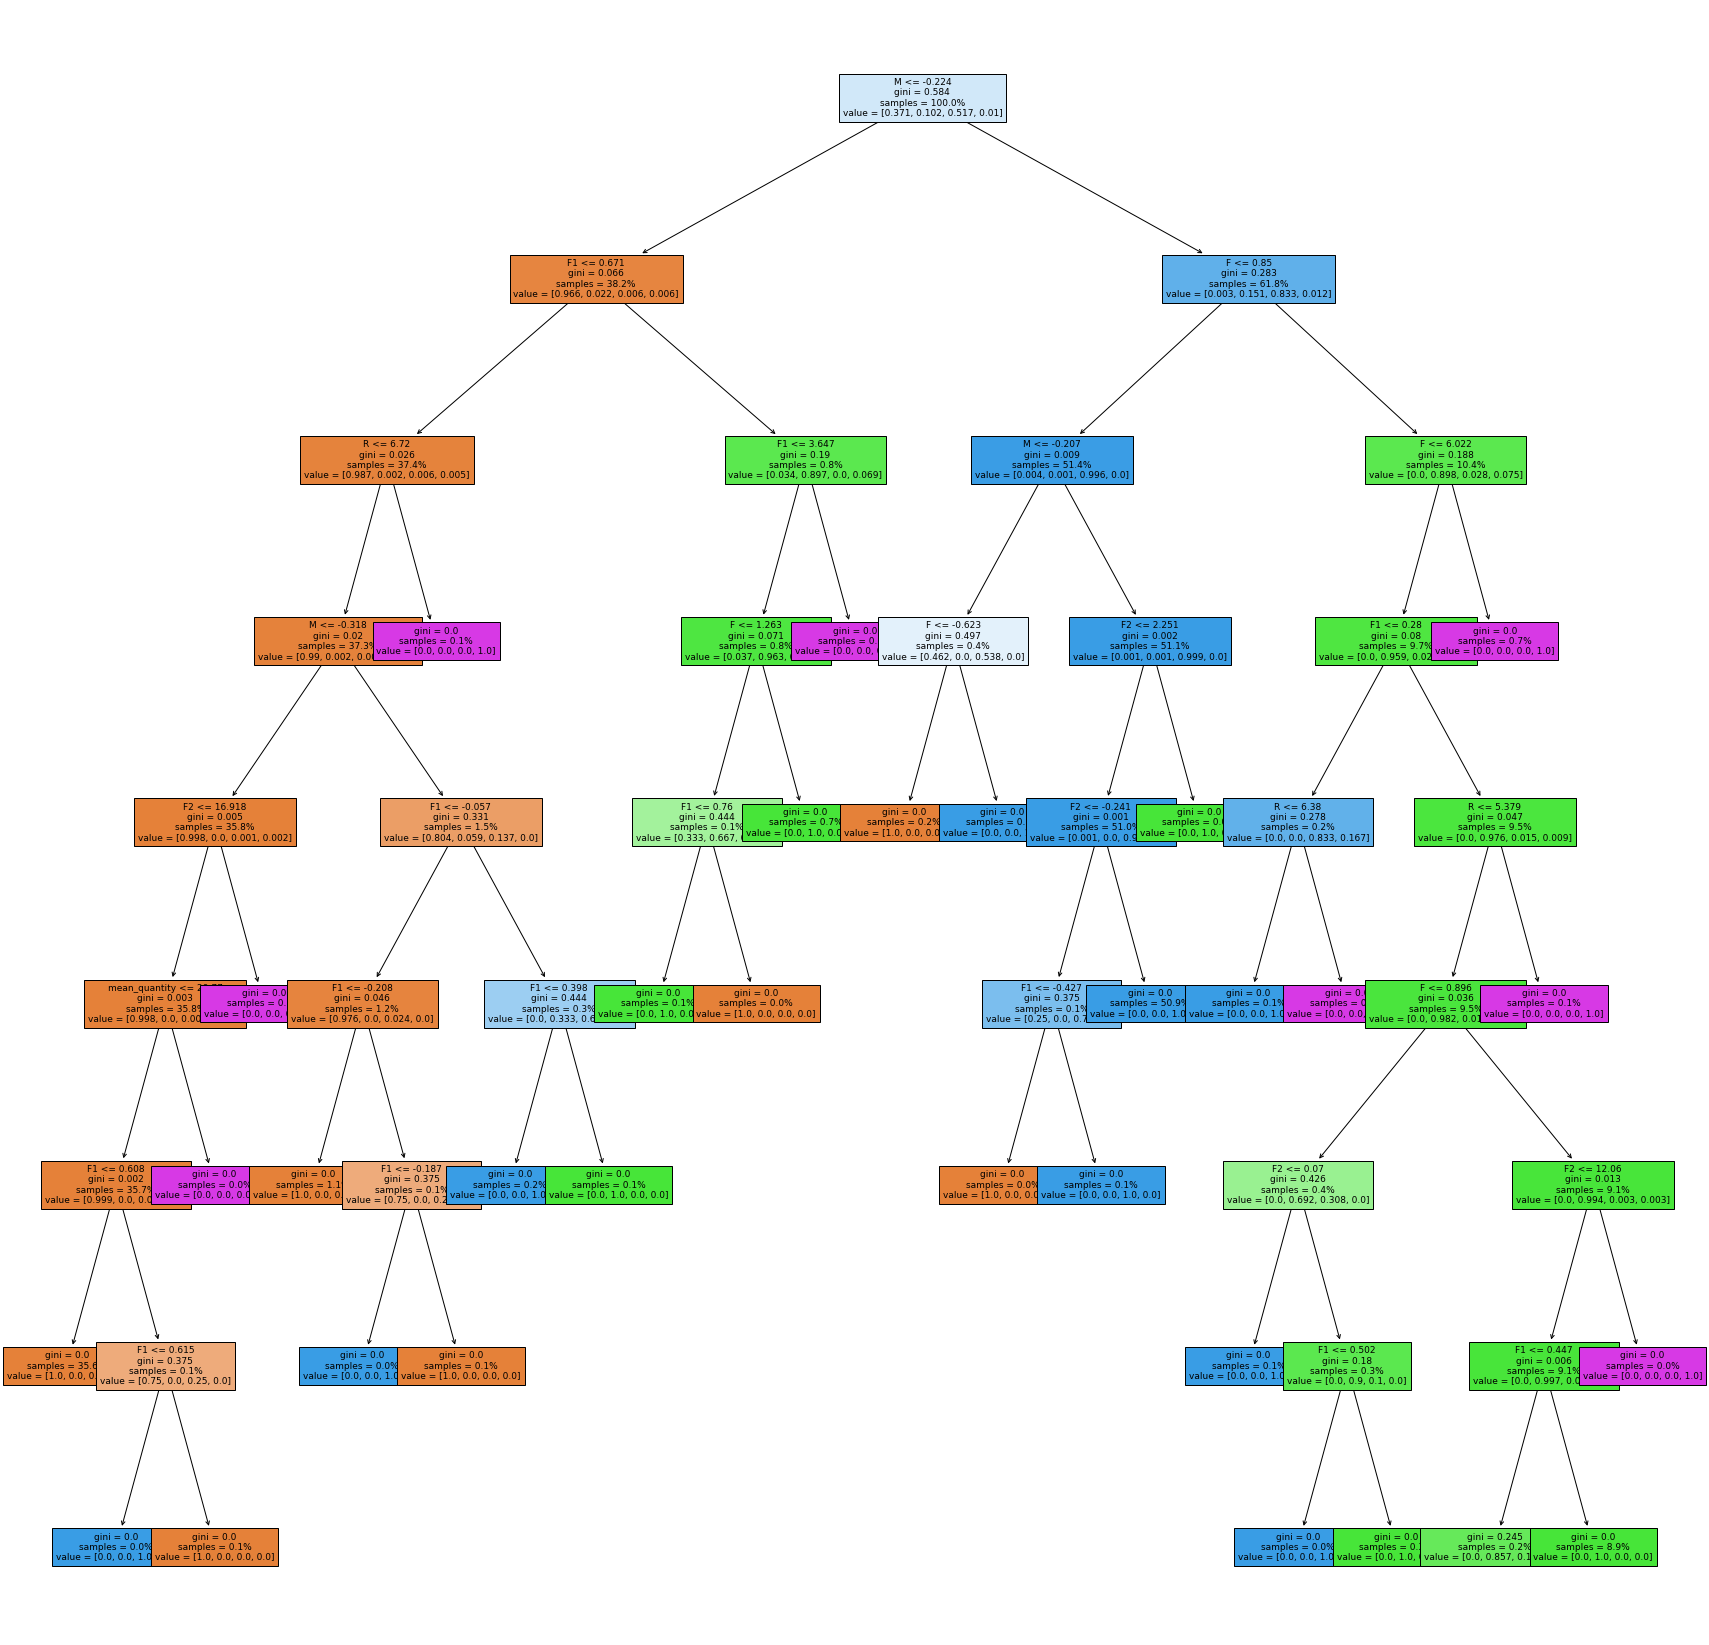

In [114]:
#Affichage de l'arbre de décision
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(model, filled=True,feature_names = list(df_test_stand.loc[:,{'F','M','R','mean_quantity','F1','F2'}].columns),fontsize=9,proportion = True)
plt.show()

# Evaluation du score suivant le découpage du jeu d'entrainement
* Découpage standard en prenant un pourcentage du jeu total
* Prendre les premiers de la liste en l'ordonnant par date de commande
* Prendre les plus gros consommateurs
* nbre par cluster si pas mon nombre je ne le prends pas du tout

In [115]:
#Découpage sur la variable classification
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(df_train_stand, df_train_stand['Classification']):
    strat_train_test = df_train_stand.loc[train_index]
    
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(strat_train_test.drop({'Classification','CustomerID'}, axis=1).to_numpy(), strat_train_test['Classification'].to_numpy())

print(clf.best_estimator_)

#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=11)
model.fit(strat_train_test.drop({'Classification','CustomerID'}, axis=1).to_numpy(),strat_train_test['Classification'].to_numpy())
model.score(X_test,y_test)

DecisionTreeClassifier(max_depth=10)


0.9817142857142858

In [117]:
#Découpage pour prendre les 2800 première lignes triées par date de commande
first = df_train_stand.loc[0:2800,]
    
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(first.drop({'Classification','CustomerID'}, axis=1).to_numpy(), first['Classification'].to_numpy())

print(clf.best_estimator_)

#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=5)
model.fit(first.drop({'Classification','CustomerID'}, axis=1).to_numpy(),first['Classification'].to_numpy())
model.score(X_test,y_test)

DecisionTreeClassifier(max_depth=10)


0.9851428571428571

In [118]:
#Découpage pour prendre les 2800 première lignes classées par R (Date du dernièr achat)
first_R = df_train_stand.sort_values(by = 'R').loc[0:2800,]
    
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(first_R.drop({'Classification','CustomerID'}, axis=1).to_numpy(), first_R['Classification'].to_numpy())

print(clf.best_estimator_)


#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=8)
model.fit(first_R.drop({'Classification','CustomerID'}, axis=1).to_numpy(),first_R['Classification'].to_numpy())
model.score(X_test,y_test)

DecisionTreeClassifier(max_depth=4)


0.6617142857142857

In [119]:
#Découpage pour prendre les 2800 première lignes classées par M (Montant achat)
first_M = df_train_stand.sort_values(by = 'M').loc[0:2800,]
    
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(first_M.drop({'Classification','CustomerID'}, axis=1).to_numpy(), first_M['Classification'].to_numpy())

print(clf.best_estimator_)


#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=8)
model.fit(first_M.drop({'Classification','CustomerID'}, axis=1).to_numpy(),first_M['Classification'].to_numpy())
model.score(X_test,y_test)

C:\Users\jerom\anaconda3\envs\PROJET5\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


DecisionTreeClassifier(max_depth=2)


0.96